# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!
  
#### Import all the necessary libraries here:


In [1]:
# Libraries
import pandas as pd
import numpy as np

# Challenge 1

#### Read the `employees` dataset from Ironhack's database:
* db: `employees`
* table: `employees`

Save your data in a variable called `employees`.

In [7]:
# your code here
employees = pd.read_csv("..\employees.csv")

In [8]:
del employees["Unnamed: 0"]
employees

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean `Salary` by `Department`?
**Tip**: There are 2 ways to do it: with or without pivot tables. Do it both ways. 

In [9]:
# Method 1
# your code here
employees[["Department", "Salary"]].groupby("Department").sum()

,Salary
Department,
HR,135
IT,195
Sales,110


In [23]:
# Method 2
# your code here
pd.pivot_table(employees, index=["Department"])[["Salary"]]
#employees.pivot_table(index=["Department"])[["Salary"]]

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### Now, group the data by more than one column. Use Pandas pivot table function to select the mean `Salary` by `Department` and `Title`.

In [24]:
# your code here
pd.pivot_table(employees, index=["Department", "Title"])[["Salary"]]

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### Display the number of `Years` of work experience and the `Salary` for each `Title`. Add `Years` as a column in your pivot table.
**Hint**: Use Pandas documentation to explore the [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) function.

In [25]:
# your code here
pd.pivot_table(employees, index=["Title"])

,Salary,Years
Title,,
VP,70.000000,8.00
analyst,32.500000,2.25
associate,56.666667,4.00


#### Find the mean `Salary` and number of employees in each `Department` and for each job `Title`.

In [54]:
# your code here
employees.pivot_table(values = ["Salary", "Name"], index=["Department"], aggfunc=["mean", "count"])

mean count       
           Salary  Name Salary
Department                    
HR          45.00     3      3
IT          48.75     4      4
Sales       55.00     2      2

#### For each `Department` and each job `Title`, find the `Salary` median, minimum, maximum and standard deviation. Comment your results.

In [34]:
# your code here
pd.pivot_table(employees, index=["Department", "Title"], aggfunc="describe")[["Salary"]]

Salary                                               
                        25%   50%    75% count   max  mean   min       std
Department Title                                                          
HR         VP         70.00  70.0  70.00   1.0  70.0  70.0  70.0       NaN
           analyst    31.25  32.5  33.75   2.0  35.0  32.5  30.0  3.535534
IT         VP         70.00  70.0  70.00   1.0  70.0  70.0  70.0       NaN
           analyst    31.25  32.5  33.75   2.0  35.0  32.5  30.0  3.535534
           associate  60.00  60.0  60.00   1.0  60.0  60.0  60.0       NaN
Sales      associate  55.00  55.0  55.00   2.0  55.0  55.0  55.0  0.000000

In [42]:
"""
as there are one or (max) two employees per position the median, minimum, maximum and standard deviation is very
unspectacular here. Only slightly different values for q1, q2, q3, min, max, for titles were more people work. no difference
for the rest.

std doesnt make to much sense here, in my opinion, but the std for these cases with NaN could be written as zero.
"""

'\nas there are one or (max) two employees per position the median, minimum, maximum and standard deviation is very\nunspectacular here. Only slightly different values for q1, q2, q3, min, max, for titles were more people work. no difference\nfor the rest.\n\nstd doesnt make to much sense here, in my opinion.\n'

#### Based on your comments, fill the missing values with an appropriate value.

In [48]:
# your code here
pd.pivot_table(employees, index=["Department", "Title"], aggfunc="describe")[["Salary"]].fillna(0)

Salary                                               
                        25%   50%    75% count   max  mean   min       std
Department Title                                                          
HR         VP         70.00  70.0  70.00   1.0  70.0  70.0  70.0  0.000000
           analyst    31.25  32.5  33.75   2.0  35.0  32.5  30.0  3.535534
IT         VP         70.00  70.0  70.00   1.0  70.0  70.0  70.0  0.000000
           analyst    31.25  32.5  33.75   2.0  35.0  32.5  30.0  3.535534
           associate  60.00  60.0  60.00   1.0  60.0  60.0  60.0  0.000000
Sales      associate  55.00  55.0  55.00   2.0  55.0  55.0  55.0  0.000000

#### The stake holders want to know, for each `Department`, the number of employees and how much money is spent on salaries. Could you provide that information? 

In [53]:
employees.pivot_table(values = ["Salary"], index=["Department"], aggfunc=["sum", "count"])

,sum,count
,Salary,Salary
Department,,
HR,135,3
IT,195,4
Sales,110,2


#### For each `Department` and `Title`, find the the total years of work experience and the mean `Salary`.

In [55]:
# your code here
employees.pivot_table(values = ["Salary", "Years"], index=["Department", "Title"], aggfunc=["sum", "mean"])

sum         mean      
                     Salary Years Salary Years
Department Title                              
HR         VP            70     8   70.0   8.0
           analyst       65     6   32.5   3.0
IT         VP            70     8   70.0   8.0
           analyst       65     3   32.5   1.5
           associate     60     7   60.0   7.0
Sales      associate    110     5   55.0   2.5

## Bonus Challenge 1

#### Compute the mean `Salary` after removing the maximum `Salary` for each `Department`. Create the appropriate pivot table.
**Hint**: Write a custom function.

In [ ]:
# your code here

# Challenge 2

#### Read the `fitbit` dataset from Ironhack's database:
* db: `fitbit`
* table: `fitbit`

Save your data in a variable called `fitbit`.

In [58]:
# your code here
fitbit=pd.read_csv("../fitbit.csv")

#### Explore you dataset in terms of data types and descriptive statistics.
**Hint**: Use Pandas functions from previous lectures.

In [59]:
# your code here
fitbit.describe()

,Unnamed: 0,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,NumberOfAwakings,LengthOfRestInMinutes,Distance_miles,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months_encoded
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,...,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,183.000000,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,...,16.196185,321.343324,5.312180,3.010899,0.713896,4.841326,76.362799,4.818529,76.119842,6.501362
std,106.088014,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,...,10.757622,170.786726,2.118801,1.998604,0.452555,2.579205,32.973194,2.584930,33.206279,3.459267
min,0.000000,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,91.500000,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,...,7.000000,248.000000,3.824539,1.000000,0.000000,3.733333,86.238532,3.725000,86.233673,3.500000
50%,183.000000,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,...,16.000000,370.000000,5.151166,3.000000,1.000000,5.616667,89.433962,5.600000,89.433962,7.000000
75%,274.500000,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,...,24.000000,440.500000,6.561678,5.000000,1.000000,6.675000,92.438419,6.650000,92.438419,9.500000
max,366.000000,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,...,45.000000,607.000000,12.707037,6.000000,1.000000,9.216667,100.000000,9.216667,100.000000,12.000000


In [63]:
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 25 columns):
Unnamed: 0                    367 non-null int64
Date                          367 non-null object
Calorie burned                367 non-null int64
Steps                         367 non-null int64
Distance                      367 non-null float64
Floors                        367 non-null int64
Minutes Sedentary             367 non-null float64
Minutes Lightly Active        367 non-null int64
Minutes Fairly Active         367 non-null int64
Minutes Very Active           367 non-null int64
Activity Calories             367 non-null int64
MinutesOfSleep                367 non-null int64
MinutesOfBeingAwake           367 non-null int64
NumberOfAwakings              367 non-null int64
LengthOfRestInMinutes         367 non-null int64
Distance_miles                367 non-null float64
Days                          367 non-null object
Days_encoded                  367 non-null float64
Wor

#### You suspect that there must be a linear relationship between the `Minutes Very Active` and the `Steps`. Compute the correlation between these variables.

In [64]:
# your code here
fitbit[["Minutes Very Active", "Steps"]].corr(method="pearson")

,Minutes Very Active,Steps
Minutes Very Active,1.000000,0.571452
Steps,0.571452,1.000000


#### Use matplotlib to visually plot `Minutes Very active` vs `Steps`. We'll work with matplotlib next week. As a first introduction, uncomment and complete the following code. You need to replace the # symbol for the correct function arguments. 

In [65]:
import matplotlib.pyplot as plt;

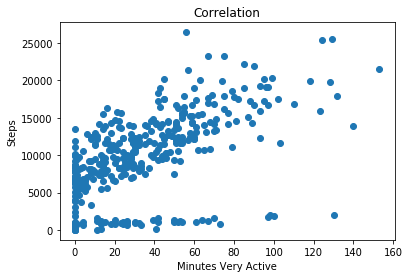

In [67]:
plt.scatter(fitbit["Minutes Very Active"], fitbit["Steps"])
plt.title("Correlation")
plt.xlabel("Minutes Very Active")
plt.ylabel("Steps")
plt.show()

#### What can you say about `Minutes Very Active` and `Steps`? Write a comment below.

In [68]:
"""
There is a positive correlation
"""

'\nThere is a positive correlation\n'

#### We also suspect that there must be a linear relationship between the `Minutes Sedentary` and the `Steps`. Compute the correlation between these variables.

In [70]:
# your code here
fitbit[["Minutes Sedentary", "Steps"]].corr(method="pearson")

,Minutes Sedentary,Steps
Minutes Sedentary,1.000000,0.076906
Steps,0.076906,1.000000


#### Use matplotlib to visually plot `Minutes Sedentary` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

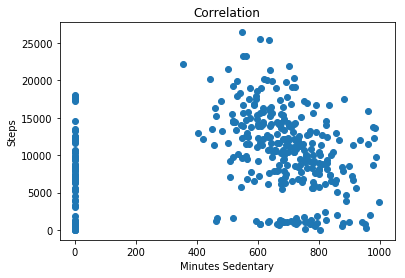

In [71]:
# your code here
plt.scatter(fitbit["Minutes Sedentary"], fitbit["Steps"])
plt.title("Correlation")
plt.xlabel("Minutes Sedentary")
plt.ylabel("Steps")
plt.show()

In [72]:
"""
eventhough the computation shows a higher correlation, it can be seen in the graph that there is a mentionably part
where there couldnt be find any correlation
"""

'\neventhough the computation shows a higher correlation, it can be seen in the graph that there is a mentionably part\nwhere there couldnt be find any correlation\n'

#### We also suspect that there must be a linear relationship between the `MinutesOfSleep` and the `Steps`. Compute the correlation between these variables.

In [ ]:
# your code here

#### Use matplotlib to visually plot `MinutesOfSleep` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

In [73]:
# your code here
fitbit[["MinutesOfSleep", "Steps"]].corr(method="pearson")

,MinutesOfSleep,Steps
MinutesOfSleep,1.000000,0.130986
Steps,0.130986,1.000000


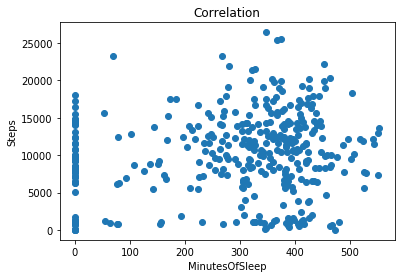

In [75]:
plt.scatter(fitbit["MinutesOfSleep"], fitbit["Steps"])
plt.title("Correlation")
plt.xlabel("MinutesOfSleep")
plt.ylabel("Steps")
plt.show()

In [76]:
"""
There is no significant correlation
"""

'\nThere is no significant correlation\n'

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`.

In [78]:
columns = ['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']

In [81]:
# your code here
cor_fit=fitbit[columns].corr(method="pearson")
cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix, which of the features are highly correlated with variable `Steps`?
**Hint**: sort the correlations of `Steps` vs the rest of the features in descending order. You can use Pandas `sort_values`. 

In [86]:
# your code here
cor_fit[["Steps"]].sort_values("Steps")

,Steps
Minutes Sedentary,0.076906
MinutesOfSleep,0.130986
Calorie burned,0.255305
Floors,0.306511
Minutes Very Active,0.571452
Steps,1.000000


In [ ]:
"""
Highest correlation for "minutes very active", but to be honest still not a high correlation

"""

# Challenge 3

#### Read the `time_grades` dataset from Ironhack's database:
* db: `time_grades`
* table: `time_grades`

Save your data in a variable called `time_grades`.

In [92]:
# your code here
time_grades=pd.read_csv("../time_grades.csv")
del time_grades["Unnamed: 0"]
time_grades

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the `time_grades` dataset.

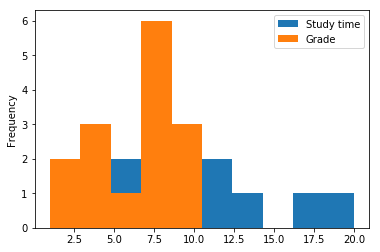

In [95]:
# your code here
time_grades.plot(kind="hist")

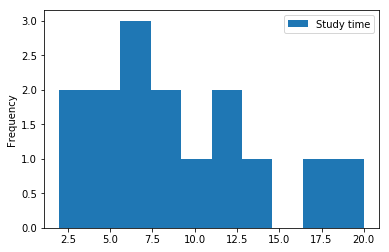

In [96]:
time_grades[["Study time"]].plot(kind="hist")

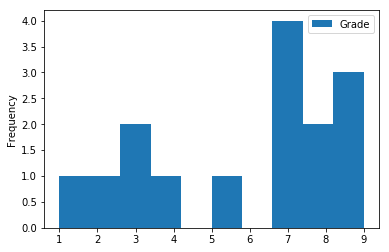

In [97]:
time_grades[["Grade"]].plot(kind="hist")

#### Is there a correlation between `Study time` and `Grade`? Use both Pearson and Spearman correlations and comment your results.

In [99]:
# your code here
time_grades.corr(method="pearson")

,Study time,Grade
Study time,1.000000,0.798046
Grade,0.798046,1.000000


In [100]:
time_grades.corr(method="spearman")

,Study time,Grade
Study time,1.000000,0.819659
Grade,0.819659,1.000000


In [ ]:
"""
Yes, there seems to be a correlation. the spearman correlation( shows monotonic relationships) is higher than the pearson
correlation, which is a hint that the correlation is not simply linear. 
"""

#### Use matplotlib to visually plot `Study time` vs `Grade`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

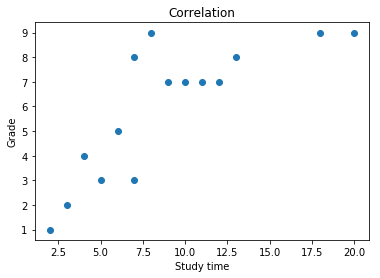

In [101]:
# your code here
plt.scatter(time_grades["Study time"], time_grades["Grade"])
plt.title("Correlation")
plt.xlabel("Study time")
plt.ylabel("Grade")
plt.show()

In [ ]:
"""
Like I sad before. There seems to be a correlation between these two. But it seems to be better explained and described
as monotonic relation than a linear one
"""

#### Could you explain the difference between Pearson and Spearman correlations?

In [103]:
"""
Like I did before, the spearman correlation(shows monotonic relationships) and not only linear ones
as the pearson one does. 
"""

'\nLike I did before, the spearman correlation(shows monotonic relationships) and not only linear ones\nas the pearson one does. \n'